In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from pandas.plotting import register_matplotlib_converters
import statsmodels.api as sm # version 0.8.0以上
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_error,r2_score
import os
import warnings
warnings.filterwarnings('ignore') # 計算警告を非表示

In [2]:
path = 'COVID-19'
if not os.path.exists(path):
  !git clone https://github.com/CSSEGISandData/COVID-19.git
else:
  print("Dude!! This file is already download")

Dude!! This file is already download


In [3]:
df = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df = df[df['Country/Region'] == 'Japan']
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20
151,NaN,Japan,36.204824,138.252924,2,2,2,2,4,4,...,88962,89400,89652,90153,90694,91402,92044,92670,93098,93408


In [4]:
df = df.iloc[:,4:]#.copy()#copy()をつかはないと代入前のデータも削ってしまう。
print(df)
daily_japan=df.iloc[0,:]
print(daily_japan)
daily_japan.index = pd.to_datetime(daily_japan.index)
print(daily_japan)

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
151        2        2        2        2        4        4        7        7   

     1/30/20  1/31/20    ...     10/10/20  10/11/20  10/12/20  10/13/20  \
151       11       15    ...        88962     89400     89652     90153   

     10/14/20  10/15/20  10/16/20  10/17/20  10/18/20  10/19/20  
151     90694     91402     92044     92670     93098     93408  

[1 rows x 272 columns]
1/22/20         2
1/23/20         2
1/24/20         2
1/25/20         2
1/26/20         4
1/27/20         4
1/28/20         7
1/29/20         7
1/30/20        11
1/31/20        15
2/1/20         20
2/2/20         20
2/3/20         20
2/4/20         22
2/5/20         23
2/6/20         23
2/7/20         23
2/8/20         24
2/9/20         24
2/10/20        26
2/11/20        27
2/12/20        28
2/13/20        33
2/14/20        43
2/15/20        54
2/16/20        60
2/17/20        67
2/18/20        79
2/19/20        85
2/20/20     

<function matplotlib.pyplot.show(*args, **kw)>

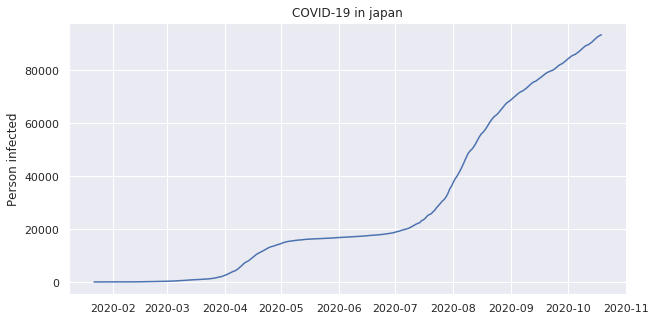

In [5]:
sns.set()
plt.figure(figsize=(10, 5))
plt.plot(daily_japan)
plt.title('COVID-19 in japan')
plt.grid(True)
plt.ylabel('Person infected')
plt.show

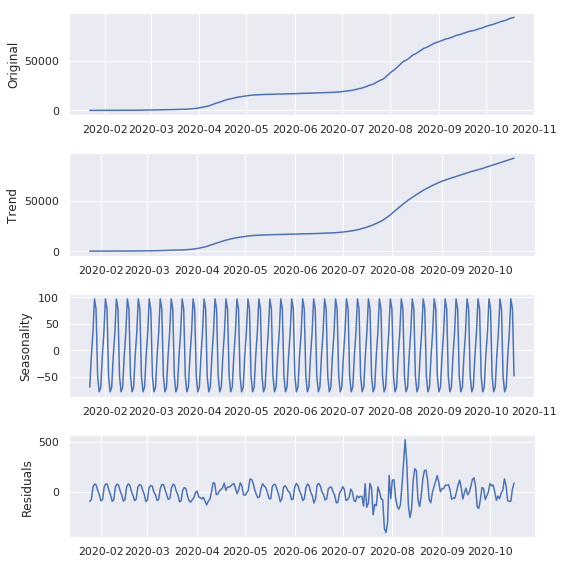

In [6]:
res = sm.tsa.seasonal_decompose(daily_japan)#データを分解

original = daily_japan # オリジナルデータ
trend = res.trend # トレンドデータ
seasonal = res.seasonal # 季節性データ
residual = res.resid # 残差データ

plt.figure(figsize=(8, 8)) # グラフ描画枠作成、サイズ指定

# オリジナルデータのプロット
plt.subplot(411) # グラフ4行1列の1番目の位置（一番上）
plt.plot(original)
plt.ylabel('Original')

# trend データのプロット
plt.subplot(412) # グラフ4行1列の2番目の位置
plt.plot(trend)
plt.ylabel('Trend')

# seasonalデータ のプロット
plt.subplot(413) # グラフ4行1列の3番目の位置
plt.plot(seasonal)
plt.ylabel('Seasonality')

# residual データのプロット
plt.subplot(414) # グラフ4行1列の4番目の位置（一番下）
plt.plot(residual)
plt.ylabel('Residuals')

plt.tight_layout() # グラフの間隔を自動調整

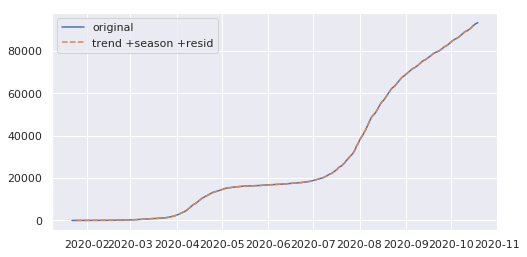

In [7]:
sum_three_data = trend + seasonal + residual # トレンド + 季節性 + 残差

plt.figure(figsize=(8, 4)) # グラフ描画枠作成、サイズ指定
plt.plot(original, label='original')
plt.plot(sum_three_data, label='trend +season +resid', linestyle='--')
plt.legend(loc='best') # 凡例表示

In [8]:
# ADF検定（原型列で確認だけ）
res_ctt = sm.tsa.stattools.adfuller(daily_japan, regression="ctt") # トレンド項あり（２次）、定数項あり
res_ct = sm.tsa.stattools.adfuller(daily_japan, regression="ct") # トレンド項あり（１次）、定数項あり
res_c = sm.tsa.stattools.adfuller(daily_japan, regression="c") # トレンド項なし、定数項あり
res_nc = sm.tsa.stattools.adfuller(daily_japan, regression="nc") # トレンド項なし、定数項なし

In [9]:
print("ctt:")
print(res_ctt[1])
print("-------------------------------")
print("ct:")
print(res_ct[1])
print("-------------------------------")
print("c:")
print(res_c[1])
print("-------------------------------")
print("nc:")
print(res_nc[1])

ctt:
0.47291254303096286
-------------------------------
ct:
0.9172864066182708
-------------------------------
c:
0.996017692916598
-------------------------------
nc:
0.9820558713100673


出力結果の2番目の値がp値です。ADF検定ではでデータが単位根過程であることが帰無仮説になっていているので、棄却することができればデータが単位根過程でない、つまり定常であると判断できます。

In [10]:
daily_japan_acf = sm.tsa.stattools.acf(daily_japan, nlags=40) #ラグ=40(デフォルト値)、省略可能
#daily_japan_acf

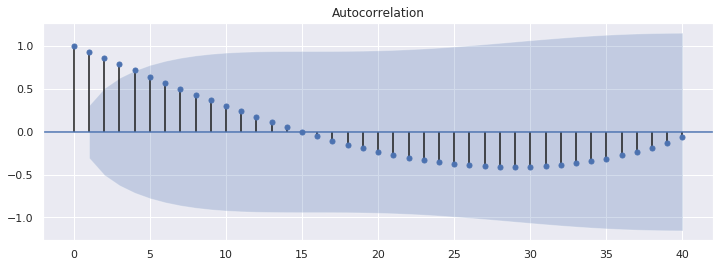

In [11]:
# 自己相関(ACF)のグラフ自動作成
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(111)
sm.graphics.tsa.plot_acf(daily_japan_acf, lags=40, ax=ax1) #飛行機乗客数データ、ラグ40、グラフaxes
plt.show() # インライン表示で同じグラフが2個出でるので回避

In [12]:
daily_japan_pacf = sm.tsa.stattools.pacf(daily_japan, nlags=40) #ラグ=40(デフォルト値)、省略可能
#daily_japan_pacf

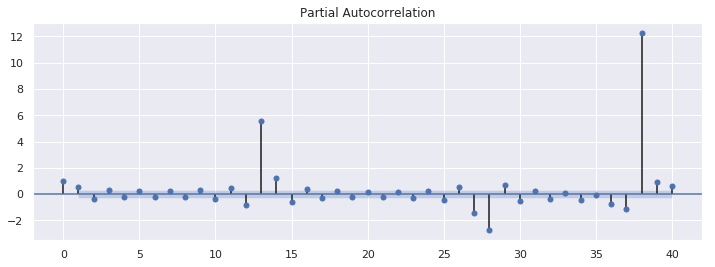

In [13]:
# 自己相関(ACF)のグラフ自動作成
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(111)
sm.graphics.tsa.plot_pacf(daily_japan_pacf, lags=40, ax=ax1) #飛行機乗客数データ、ラグ40、グラフaxes
plt.show() # インライン表示で同じグラフが2個出でるので回避

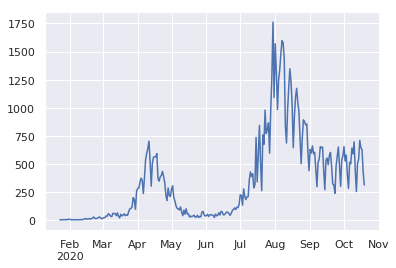

In [14]:
daily_japan_diff = daily_japan - daily_japan.shift() # 差分(1階差)　Pandasのdiff()でpassengers.diff()としてもOK
daily_japan_diff = daily_japan_diff.dropna() # 1個できるNaNデータは捨てる
daily_japan_diff.plot()

In [15]:
daily_japan_diff.tail(7)

2020-10-13    501.0
2020-10-14    541.0
2020-10-15    708.0
2020-10-16    642.0
2020-10-17    626.0
2020-10-18    428.0
2020-10-19    310.0
Name: 151, dtype: float64

In [16]:
daily_japan_diff_train = daily_japan_diff.copy()[:-7]

In [17]:
print(daily_japan_diff.tail(7))
print(daily_japan_diff_train.tail(7))

2020-10-13    501.0
2020-10-14    541.0
2020-10-15    708.0
2020-10-16    642.0
2020-10-17    626.0
2020-10-18    428.0
2020-10-19    310.0
Name: 151, dtype: float64
2020-10-06    513.0
2020-10-07    499.0
2020-10-08    640.0
2020-10-09    588.0
2020-10-10    695.0
2020-10-11    438.0
2020-10-12    252.0
Name: 151, dtype: float64


In [18]:
test_data = daily_japan_diff.copy()[-7:]
test_data

2020-10-13    501.0
2020-10-14    541.0
2020-10-15    708.0
2020-10-16    642.0
2020-10-17    626.0
2020-10-18    428.0
2020-10-19    310.0
Name: 151, dtype: float64

In [19]:
# ADF検定（原型列で確認だけ）
res_ctt = sm.tsa.stattools.adfuller(daily_japan_diff, regression="ctt") # トレンド項あり（２次）、定数項あり
res_ct = sm.tsa.stattools.adfuller(daily_japan_diff, regression="ct") # トレンド項あり（１次）、定数項あり
res_c = sm.tsa.stattools.adfuller(daily_japan_diff, regression="c") # トレンド項なし、定数項あり
res_nc = sm.tsa.stattools.adfuller(daily_japan_diff, regression="nc") # トレンド項なし、定数項なし
print("ctt:")
print(res_ctt[1])
print("-------------------------------")
print("ct:")
print(res_ct[1])
print("-------------------------------")
print("c:")
print(res_c[1])
print("-------------------------------")
print("nc:")
print(res_nc[1])

ctt:
0.43495334416138426
-------------------------------
ct:
0.21676759623652708
-------------------------------
c:
0.21754744905770285
-------------------------------
nc:
0.19486094747207094


In [20]:
daily_japan_diff_acf = sm.tsa.stattools.acf(daily_japan_diff_train, nlags=40) #ラグ=40(デフォルト値)、省略可能
#daily_japan_diff_acf

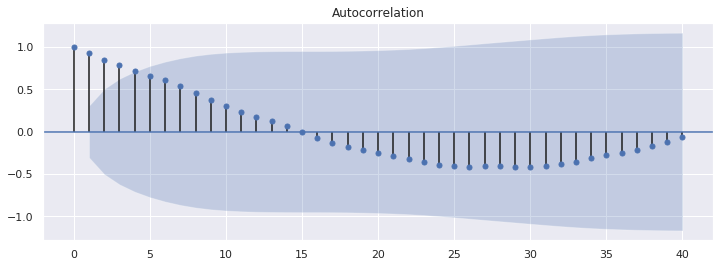

In [21]:
# 自己相関(ACF)のグラフ自動作成
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(111)
sm.graphics.tsa.plot_acf(daily_japan_diff_acf, lags=40, ax=ax1) #飛行機乗客数データ、ラグ40、グラフaxes
plt.show() # インライン表示で同じグラフが2個出でるので回避

In [22]:
daily_japan_diff_pacf = sm.tsa.stattools.pacf(daily_japan_diff_train, nlags=40) #ラグ=40(デフォルト値)、省略可能
#daily_japan_diff_pacf

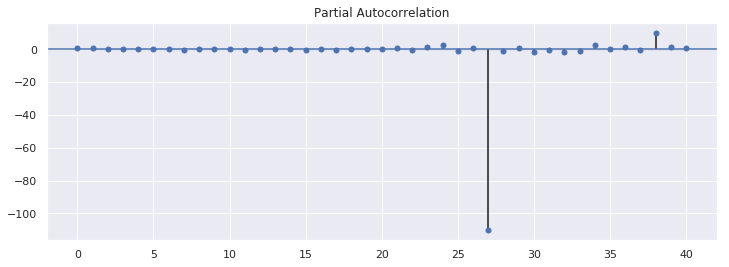

In [23]:
# 自己相関(ACF)のグラフ自動作成
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(111)
sm.graphics.tsa.plot_pacf(daily_japan_diff_pacf, lags=40, ax=ax1) #飛行機乗客数データ、ラグ40、グラフaxes
plt.show() # インライン表示で同じグラフが2個出でるので回避

In [24]:
# 自動ARMAパラメータ推定関数
res_selection = sm.tsa.arma_order_select_ic(daily_japan_diff_train, ic='aic', trend='nc')
res_selection

{'aic':              0            1            2
 0          NaN  3765.174152  3631.256343
 1  3351.867907  3345.450543  3329.229398
 2  3348.515471  3330.471404  3329.831599
 3  3344.977916  3328.091650  3286.254014
 4  3340.941689  3323.584045  3280.185814, 'aic_min_order': (4, 2)}

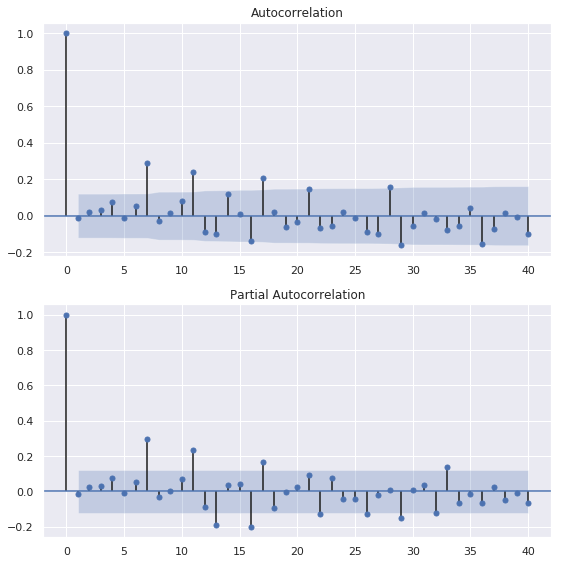

In [25]:
# SRIMAモデル（試しに）季節調整なし = ARIMAモデル
sarimax_noseasonal = sm.tsa.SARIMAX(daily_japan_diff_train, 
                        order=(4, 1, 2),
                        seasonal_order=(0, 0, 0, 0),
                        enforce_stationarity = False,
                        enforce_invertibility = False
                        ).fit()

sarimax_noseasonal_resid = sarimax_noseasonal.resid # 残差成分

fig = plt.figure(figsize=(8, 8))

# 自己相関(ACF)のグラフ
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(sarimax_noseasonal_resid, lags=40, ax=ax1) #ACF計算とグラフ自動作成

# 偏自己相関(PACF)のグラフ
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(sarimax_noseasonal_resid, lags=40, ax=ax2) #PACF計算とグラフ自動作成

plt.tight_layout() # グラフ間スキマ調整

<function matplotlib.pyplot.show(*args, **kw)>

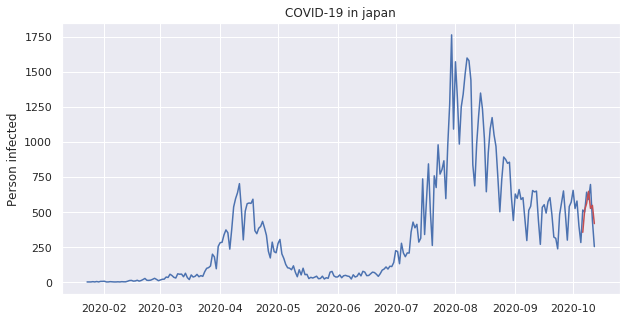

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(daily_japan_diff_train)
sarimax_noseasonal_eval = sarimax_noseasonal.predict('2020-10-06', '2020-10-12') 
plt.plot(sarimax_noseasonal_eval, c="r")

plt.title('COVID-19 in japan')
plt.grid(True)
plt.ylabel('Person infected')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

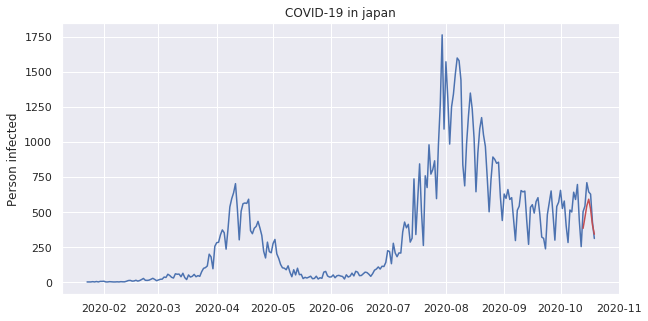

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(daily_japan_diff)
#plt.plot(test_data)
sarimax_pred = sarimax_noseasonal.predict('2020-10-13', '2020-10-19') 
plt.plot(sarimax_pred, c="r")

plt.title('COVID-19 in japan')
plt.grid(True)
plt.ylabel('Person infected')
plt.show

In [28]:
# SARIMAパラメター最適化（総当たりチェック）
import warnings
warnings.filterwarnings('ignore') # 警告非表示（収束：ConvergenceWarning）

# パラメータ範囲
# order(p, d, q)
min_p = 1; max_p = 3 # min_pは1以上を指定しないとエラー
min_d = 0; max_d = 1
min_q = 0; max_q = 3

# seasonal_order(sp, sd, sq)
min_sp = 0; max_sp = 1
min_sd = 0; max_sd = 1
min_sq = 0; max_sq = 1

test_pattern = (max_p - min_p +1)*(max_q - min_q + 1)*(max_d - min_d + 1)*(max_sp - min_sp + 1)*(max_sq - min_sq + 1)*(max_sd - min_sd + 1)
print("pattern:", test_pattern)

sfq = 14 # seasonal_order周期パラメータ
ts = daily_japan_diff_train # 時系列データ

test_results = pd.DataFrame(index=range(test_pattern), columns=["model_parameters", "aic"])
num = 0
for p in range(min_p, max_p + 1):
    for d in range(min_d, max_d + 1):
        for q in range(min_q, max_q + 1):
            for sp in range(min_sp, max_sp + 1):
                for sd in range(min_sd, max_sd + 1):
                    for sq in range(min_sq, max_sq + 1):
                        try:
                            sarima = sm.tsa.SARIMAX(
                                ts, order=(p, d, q), 
                                seasonal_order=(sp, sd, sq, sfq), 
                                enforce_stationarity = True, 
                                enforce_invertibility = True
                            ).fit()
                            test_results.iloc[num]["model_parameters"] = "order=(" + str(p) + ","+ str(d) + ","+ str(q) + "), seasonal_order=("+ str(sp) + ","+ str(sd) + "," + str(sq) + ")"
                            test_results.iloc[num]["aic"] = sarima.aic
                            print(num,'/', test_pattern-1, test_results.iloc[num]["model_parameters"],  test_results.iloc[num]["aic"] )
                            num = num + 1
                        except:
                            continue

# 結果（最小AiC）
print("best[aic] parameter ********")
print(test_results[test_results.aic == min(test_results.aic)])

pattern: 192
0 / 191 order=(1,0,0), seasonal_order=(0,0,0) 3351.8679070603225
1 / 191 order=(1,0,0), seasonal_order=(0,0,1) 3326.4542453079393
2 / 191 order=(1,0,0), seasonal_order=(0,1,0) 3214.1922628704374
3 / 191 order=(1,0,0), seasonal_order=(0,1,1) 3126.467326276471
4 / 191 order=(1,0,0), seasonal_order=(1,0,0) 3309.805775889921
5 / 191 order=(1,0,0), seasonal_order=(1,0,1) 3289.133299637153
6 / 191 order=(1,0,0), seasonal_order=(1,1,0) 3156.845187387439
7 / 191 order=(1,0,0), seasonal_order=(1,1,1) 3127.7981665947636
8 / 191 order=(1,0,1), seasonal_order=(0,0,0) 3345.4505434076373
9 / 191 order=(1,0,1), seasonal_order=(0,0,1) 3311.2499160469065
10 / 191 order=(1,0,1), seasonal_order=(0,1,0) 3191.392461884778
11 / 191 order=(1,0,1), seasonal_order=(0,1,1) 3109.774500538069
12 / 191 order=(1,0,1), seasonal_order=(1,0,0) 3290.3335759681254
13 / 191 order=(1,0,1), seasonal_order=(1,0,1) 3272.5811240257844
14 / 191 order=(1,0,1), seasonal_order=(1,1,0) 3139.4722355933336
15 / 191 orde

125 / 191 order=(3,1,1), seasonal_order=(0,0,1) 3280.4543949219133
126 / 191 order=(3,1,1), seasonal_order=(0,1,0) 3178.127394714845
127 / 191 order=(3,1,1), seasonal_order=(0,1,1) 3098.222910397034
128 / 191 order=(3,1,1), seasonal_order=(1,0,0) 3267.1686141575565
129 / 191 order=(3,1,1), seasonal_order=(1,0,1) 3256.147996690843
130 / 191 order=(3,1,1), seasonal_order=(1,1,0) 3131.4944983349883
131 / 191 order=(3,1,1), seasonal_order=(1,1,1) 3097.056732591327
132 / 191 order=(3,1,2), seasonal_order=(0,1,0) 3164.947524645293
133 / 191 order=(3,1,2), seasonal_order=(0,1,1) 3076.082286439253
134 / 191 order=(3,1,2), seasonal_order=(1,1,0) 3103.614361345412
135 / 191 order=(3,1,2), seasonal_order=(1,1,1) 3075.4797332901353
136 / 191 order=(3,1,3), seasonal_order=(0,1,0) 3148.5386095262706
137 / 191 order=(3,1,3), seasonal_order=(0,1,1) 3085.955507497601
138 / 191 order=(3,1,3), seasonal_order=(1,1,0) 3115.732665991545
139 / 191 order=(3,1,3), seasonal_order=(1,1,1) 3091.588410139698
best[

In [29]:
test_results.sort_values(by='aic').head(10) # aic top10

,model_parameters,aic
135,"order=(3,1,2), seasonal_order=(1,1,1)",3075.48
133,"order=(3,1,2), seasonal_order=(0,1,1)",3076.08
89,"order=(2,1,2), seasonal_order=(0,1,1)",3078.43
91,"order=(2,1,2), seasonal_order=(1,1,1)",3079.27
93,"order=(2,1,3), seasonal_order=(0,1,1)",3081.21
137,"order=(3,1,3), seasonal_order=(0,1,1)",3085.96
95,"order=(2,1,3), seasonal_order=(1,1,1)",3087.2
139,"order=(3,1,3), seasonal_order=(1,1,1)",3091.59
51,"order=(1,1,3), seasonal_order=(0,1,1)",3094.31
55,"order=(1,1,3), seasonal_order=(1,1,1)",3094.94


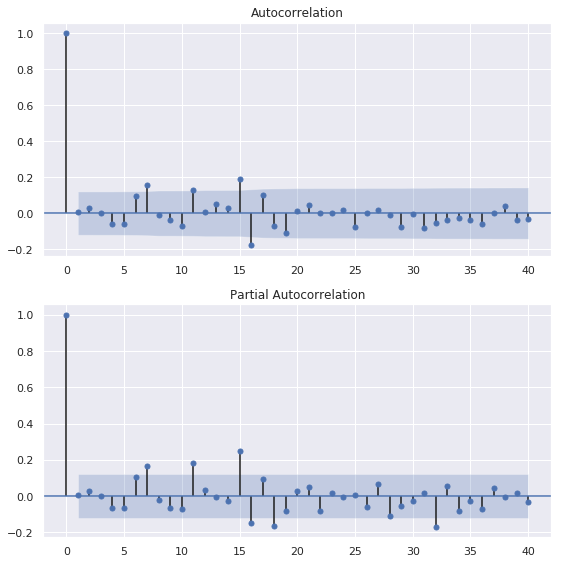

In [45]:
# SRIMAモデル（ちょっとだけパラメータ最適化・総当たりaicベストを適用）
sarimax_optimization = sm.tsa.SARIMAX(daily_japan_diff_train, 
                        order=(3, 1, 2),
                        seasonal_order=(0, 1, 1, 14),
                        enforce_stationarity = True, 
                        enforce_invertibility = True
                        ).fit()

sarimax_optimization_resid = sarimax_optimization.resid # 残差成分

fig = plt.figure(figsize=(8, 8))

# 自己相関(ACF)のグラフ
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(sarimax_optimization_resid, lags=40, ax=ax1) #ACF計算とグラフ自動作成

# 偏自己相関(PACF)のグラフ
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(sarimax_optimization_resid, lags=40, ax=ax2) #PACF計算とグラフ自動作成

plt.tight_layout() # グラフ間スキマ調整

<function matplotlib.pyplot.show(*args, **kw)>

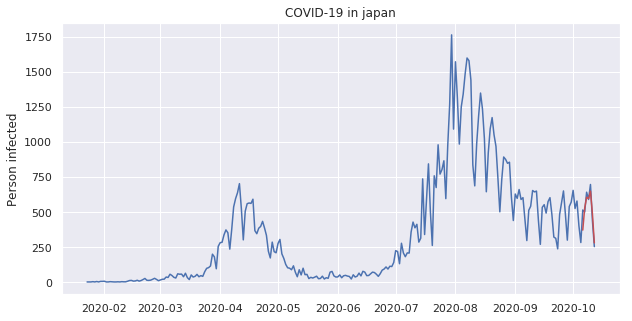

In [46]:
plt.figure(figsize=(10, 5))
plt.plot(daily_japan_diff_train)
sarimax_eval = sarimax_optimization.predict('2020-10-06', '2020-10-12') 
plt.plot(sarimax_eval, c="r")

plt.title('COVID-19 in japan')
plt.grid(True)
plt.ylabel('Person infected')
plt.show

In [32]:
print(sarimax_eval)
eval_data = daily_japan_diff_train.iloc[-7:].copy()
print(eval_data)

2020-10-06    395.261586
2020-10-07    553.438539
2020-10-08    596.005653
2020-10-09    580.194640
2020-10-10    631.891969
2020-10-11    475.170553
2020-10-12    265.833934
Freq: D, dtype: float64
2020-10-06    513.0
2020-10-07    499.0
2020-10-08    640.0
2020-10-09    588.0
2020-10-10    695.0
2020-10-11    438.0
2020-10-12    252.0
Name: 151, dtype: float64


<function matplotlib.pyplot.show(*args, **kw)>

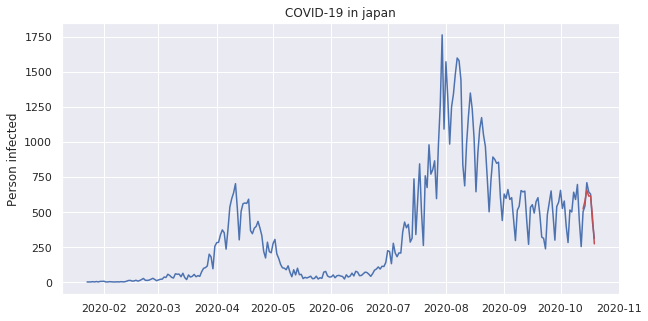

In [47]:
plt.figure(figsize=(10, 5))
plt.plot(daily_japan_diff)
# plt.plot(test_data)
sarimax_pred = sarimax_optimization.predict('2020-10-13', '2020-10-19') 
plt.plot(sarimax_pred, c="r")

plt.title('COVID-19 in japan')
plt.grid(True)
plt.ylabel('Person infected')
plt.show

In [48]:
sarimax_pred_train = sarimax_optimization.predict('2020-01-23', '2020-10-12')
train_mae = mean_absolute_error(daily_japan_diff_train, sarimax_pred_train)
train_mse = mean_squared_error(daily_japan_diff_train, sarimax_pred_train)
train_rmse = np.sqrt(mean_squared_error(daily_japan_diff_train, sarimax_pred_train))
train_r2 = r2_score(daily_japan_diff_train, sarimax_pred_train)

test_mae = mean_absolute_error(test_data, sarimax_pred)
test_mse = mean_squared_error(test_data, sarimax_pred)
test_rmse = np.sqrt(mean_squared_error(test_data, sarimax_pred))
test_r2 = r2_score(test_data, sarimax_pred)

print('train_mae:'+str(train_mae))
print('train_mse:'+str(train_mse))
print('train_rmae:'+str(train_rmse))
print('train_r2:'+str(train_r2))
print('')
print('test_mae:'+str(test_mae))
print('test_mse:'+str(test_mse))
print('test_rmae:'+str(test_rmse))
print('test_r2:'+str(test_r2))

train_mae:63.14259004189328
train_mse:11423.227309430247
train_rmae:106.87949901375028
train_r2:0.9205553444042518

test_mae:32.83266037129329
test_mse:1234.0424996551644
test_rmae:35.128941055135215
test_r2:0.9234924065885628


In [35]:
# SARIMAパラメター最適化（総当たりチェック）
import warnings
warnings.filterwarnings('ignore') # 警告非表示（収束：ConvergenceWarning）

# パラメータ範囲
# order(p, d, q)
min_p = 1; max_p = 3 # min_pは1以上を指定しないとエラー
min_d = 0; max_d = 1
min_q = 0; max_q = 3

# seasonal_order(sp, sd, sq)
min_sp = 0; max_sp = 1
min_sd = 0; max_sd = 1
min_sq = 0; max_sq = 1

test_pattern = (max_p - min_p +1)*(max_q - min_q + 1)*(max_d - min_d + 1)*(max_sp - min_sp + 1)*(max_sq - min_sq + 1)*(max_sd - min_sd + 1)
print("pattern:", test_pattern)

sfq = 7 # seasonal_order周期パラメータ
ts = daily_japan_diff_train # 時系列データ

test_results = pd.DataFrame(index=range(test_pattern), columns=["model_parameters", "aic"])
num = 0
for p in range(min_p, max_p + 1):
    for d in range(min_d, max_d + 1):
        for q in range(min_q, max_q + 1):
            for sp in range(min_sp, max_sp + 1):
                for sd in range(min_sd, max_sd + 1):
                    for sq in range(min_sq, max_sq + 1):
                        try:
                            sarima = sm.tsa.SARIMAX(
                                ts, order=(p, d, q), 
                                seasonal_order=(sp, sd, sq, sfq), 
                                enforce_stationarity = True, 
                                enforce_invertibility = True
                            ).fit()
                            test_results.iloc[num]["model_parameters"] = "order=(" + str(p) + ","+ str(d) + ","+ str(q) + "), seasonal_order=("+ str(sp) + ","+ str(sd) + "," + str(sq) + ")"
                            test_results.iloc[num]["aic"] = sarima.aic
                            print(num,'/', test_pattern-1, test_results.iloc[num]["model_parameters"],  test_results.iloc[num]["aic"] )
                            num = num + 1
                        except:
                            continue

# 結果（最小AiC）
print("best[aic] parameter ********")
print(test_results[test_results.aic == min(test_results.aic)])
print(test_results.sort_values(by='aic').head(10)) # aic top10

pattern: 192
0 / 191 order=(1,0,0), seasonal_order=(0,0,0) 3351.8679070603225
1 / 191 order=(1,0,0), seasonal_order=(0,0,1) 3318.207736536497
2 / 191 order=(1,0,0), seasonal_order=(0,1,0) 3249.958409229641
3 / 191 order=(1,0,0), seasonal_order=(0,1,1) 3185.6447357512943
4 / 191 order=(1,0,0), seasonal_order=(1,0,0) 3294.515124261152
5 / 191 order=(1,0,0), seasonal_order=(1,0,1) 3265.880816896546
6 / 191 order=(1,0,0), seasonal_order=(1,1,0) 3214.3326408064313
7 / 191 order=(1,0,0), seasonal_order=(1,1,1) 3185.237397788479
8 / 191 order=(1,0,1), seasonal_order=(0,0,0) 3345.4505434076373
9 / 191 order=(1,0,1), seasonal_order=(0,0,1) 3292.3034515168133
10 / 191 order=(1,0,1), seasonal_order=(0,1,0) 3219.575066554268
11 / 191 order=(1,0,1), seasonal_order=(0,1,1) 3158.2611192023583
12 / 191 order=(1,0,1), seasonal_order=(1,0,0) 3255.2159472534486
13 / 191 order=(1,0,1), seasonal_order=(1,0,1) 3236.728906399583
14 / 191 order=(1,0,1), seasonal_order=(1,1,0) 3184.6969952491118
15 / 191 order

125 / 191 order=(3,1,2), seasonal_order=(0,1,1) 3137.655022317008
126 / 191 order=(3,1,2), seasonal_order=(1,1,0) 3172.3136929816546
127 / 191 order=(3,1,2), seasonal_order=(1,1,1) 3138.282318347947
best[aic] parameter ********
                          model_parameters      aic
125  order=(3,1,2), seasonal_order=(0,1,1)  3137.66
                          model_parameters      aic
125  order=(3,1,2), seasonal_order=(0,1,1)  3137.66
127  order=(3,1,2), seasonal_order=(1,1,1)  3138.28
89   order=(2,1,2), seasonal_order=(0,1,1)  3139.84
55   order=(1,1,3), seasonal_order=(1,1,1)  3142.86
91   order=(2,1,2), seasonal_order=(1,1,1)  3143.94
43   order=(1,1,1), seasonal_order=(1,1,1)  3144.32
47   order=(1,1,2), seasonal_order=(1,1,1)  3146.32
87   order=(2,1,1), seasonal_order=(1,1,1)  3146.32
51   order=(1,1,3), seasonal_order=(0,1,1)   3147.5
123  order=(3,1,1), seasonal_order=(1,1,1)  3148.31


<function matplotlib.pyplot.show(*args, **kw)>

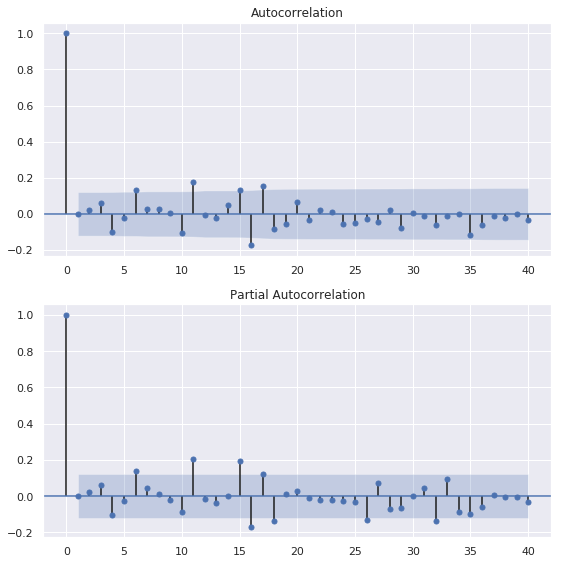

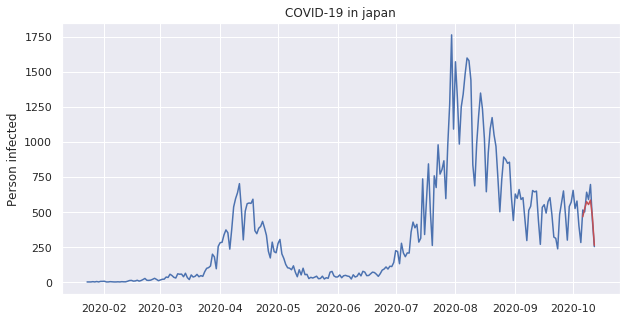

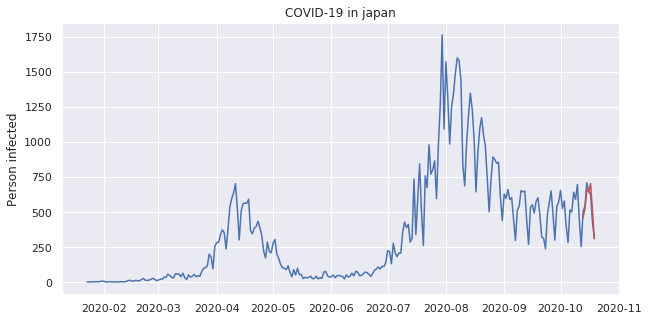

In [49]:
# SRIMAモデル（ちょっとだけパラメータ最適化・総当たりaicベストを適用）
sarimax_optimization = sm.tsa.SARIMAX(daily_japan_diff_train, 
                        order=(3, 1, 2),
                        seasonal_order=(0, 1, 1, 7),
                        enforce_stationarity = True, 
                        enforce_invertibility = True
                        ).fit()

sarimax_optimization_resid = sarimax_optimization.resid # 残差成分

fig = plt.figure(figsize=(8, 8))

# 自己相関(ACF)のグラフ
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(sarimax_optimization_resid, lags=40, ax=ax1) #ACF計算とグラフ自動作成

# 偏自己相関(PACF)のグラフ
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(sarimax_optimization_resid, lags=40, ax=ax2) #PACF計算とグラフ自動作成

plt.tight_layout() # グラフ間スキマ調整

plt.figure(figsize=(10, 5))
plt.plot(daily_japan_diff_train)
sarimax_eval = sarimax_optimization.predict('2020-10-06', '2020-10-12') 
plt.plot(sarimax_eval, c="r")

plt.title('COVID-19 in japan')
plt.grid(True)
plt.ylabel('Person infected')
plt.show

plt.figure(figsize=(10, 5))
plt.plot(daily_japan_diff)
# plt.plot(test_data)
sarimax_pred = sarimax_optimization.predict('2020-10-13', '2020-10-19') 
plt.plot(sarimax_pred, c="r")

plt.title('COVID-19 in japan')
plt.grid(True)
plt.ylabel('Person infected')
plt.show

In [50]:
sarimax_pred_train = sarimax_optimization.predict('2020-01-23', '2020-10-12')
train_mae = mean_absolute_error(daily_japan_diff_train, sarimax_pred_train)
train_mse = mean_squared_error(daily_japan_diff_train, sarimax_pred_train)
train_rmse = np.sqrt(mean_squared_error(daily_japan_diff_train, sarimax_pred_train))
train_r2 = r2_score(daily_japan_diff_train, sarimax_pred_train)

test_mae = mean_absolute_error(test_data, sarimax_pred)
test_mse = mean_squared_error(test_data, sarimax_pred)
test_rmse = np.sqrt(mean_squared_error(test_data, sarimax_pred))
test_r2 = r2_score(test_data, sarimax_pred)

print('train_mae:'+str(train_mae))
print('train_mse:'+str(train_mse))
print('train_rmae:'+str(train_rmse))
print('train_r2:'+str(train_r2))
print('')
print('test_mae:'+str(test_mae))
print('test_mse:'+str(test_mse))
print('test_rmae:'+str(test_rmse))
print('test_r2:'+str(test_r2))

train_mae:62.83777196044789
train_mse:11020.735477370745
train_rmae:104.97969078526924
train_r2:0.9233545380219497

test_mae:38.716195310464684
test_mse:2381.93202070682
test_rmae:48.80504093540769
test_r2:0.8523260855077166


In [38]:
# SARIMAパラメター最適化（総当たりチェック）
import warnings
warnings.filterwarnings('ignore') # 警告非表示（収束：ConvergenceWarning）
from tqdm import tqdm
import time

# パラメータ範囲
# order(p, d, q)
min_p = 1; max_p = 3 # min_pは1以上を指定しないとエラー
min_d = 0; max_d = 1
min_q = 0; max_q = 3

# seasonal_order(sp, sd, sq)
min_sp = 0; max_sp = 1
min_sd = 0; max_sd = 1
min_sq = 0; max_sq = 1

test_pattern = (max_p - min_p +1)*(max_q - min_q + 1)*(max_d - min_d + 1)*(max_sp - min_sp + 1)*(max_sq - min_sq + 1)*(max_sd - min_sd + 1)
print("pattern:", test_pattern)

sfq = 7 # seasonal_order周期パラメータ
ts = daily_japan_diff_train # 時系列データ

test_results = pd.DataFrame(index=range(test_pattern), columns=["model_parameters", "aic"])
num = 0
for p in tqdm(range(min_p, max_p + 1)):
    for d in range(min_d, max_d + 1):
        for q in range(min_q, max_q + 1):
            for sp in range(min_sp, max_sp + 1):
                for sd in range(min_sd, max_sd + 1):
                    for sq in range(min_sq, max_sq + 1):
                            sarima = sm.tsa.SARIMAX(
                                ts, order=(p, d, q), 
                                seasonal_order=(sp, sd, sq, sfq), 
                                enforce_stationarity = False, 
                                enforce_invertibility = False
                            ).fit()
                            test_results.iloc[num]["model_parameters"] = "order=(" + str(p) + ","+ str(d) + ","+ str(q) + "), seasonal_order=("+ str(sp) + ","+ str(sd) + "," + str(sq) + ")"
                            test_results.iloc[num]["aic"] = sarima.aic
                            #print(num,'/', test_pattern-1, test_results.iloc[num]["model_parameters"],  test_results.iloc[num]["aic"] )
                            num = num + 1
                            time.sleep(1)

# 結果（最小AiC）
print("best[aic] parameter ********")
print(test_results[test_results.aic == min(test_results.aic)])
#print(test_results.sort_values(by='aic').head(10)) # aic top10

  0%|          | 0/3 [00:00<?, ?it/s]

pattern: 192


100%|██████████| 3/3 [05:25<00:00, 108.38s/it]

best[aic] parameter ********
                          model_parameters      aic
191  order=(3,1,3), seasonal_order=(1,1,1)  3008.42


<function matplotlib.pyplot.show(*args, **kw)>

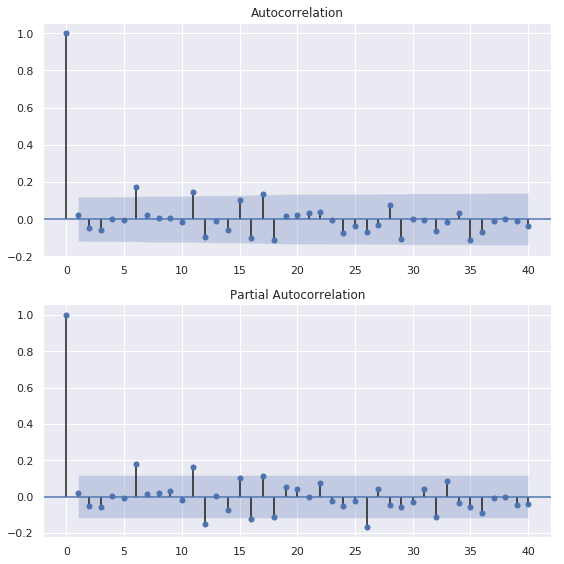

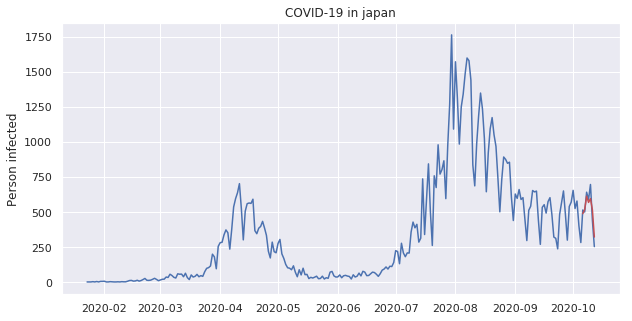

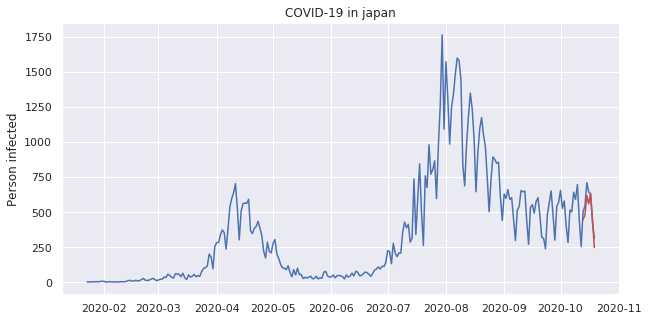

In [51]:
# SRIMAモデル（ちょっとだけパラメータ最適化・総当たりaicベストを適用）
sarimax_optimization = sm.tsa.SARIMAX(daily_japan_diff_train, 
                        order=(3, 1, 3),
                        seasonal_order=(1, 1, 1, 7),
                        enforce_stationarity = False,
                        enforce_invertibility = False
                        ).fit()

sarimax_optimization_resid = sarimax_optimization.resid # 残差成分

fig = plt.figure(figsize=(8, 8))

# 自己相関(ACF)のグラフ
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(sarimax_optimization_resid, lags=40, ax=ax1) #ACF計算とグラフ自動作成

# 偏自己相関(PACF)のグラフ
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(sarimax_optimization_resid, lags=40, ax=ax2) #PACF計算とグラフ自動作成

plt.tight_layout() # グラフ間スキマ調整

plt.figure(figsize=(10, 5))
plt.plot(daily_japan_diff_train)
sarimax_eval = sarimax_optimization.predict('2020-10-06', '2020-10-12') 
plt.plot(sarimax_eval, c="r")

plt.title('COVID-19 in japan')
plt.grid(True)
plt.ylabel('Person infected')
plt.show

plt.figure(figsize=(10, 5))
plt.plot(daily_japan_diff)
# plt.plot(test_data)
sarimax_pred = sarimax_optimization.predict('2020-10-13', '2020-10-19') 
plt.plot(sarimax_pred, c="r")

plt.title('COVID-19 in japan')
plt.grid(True)
plt.ylabel('Person infected')
plt.show

In [52]:
sarimax_pred_train = sarimax_optimization.predict('2020-01-23', '2020-10-12')
train_mae = mean_absolute_error(daily_japan_diff_train, sarimax_pred_train)
train_mse = mean_squared_error(daily_japan_diff_train, sarimax_pred_train)
train_rmse = np.sqrt(mean_squared_error(daily_japan_diff_train, sarimax_pred_train))
train_r2 = r2_score(daily_japan_diff_train, sarimax_pred_train)

test_mae = mean_absolute_error(test_data, sarimax_pred)
test_mse = mean_squared_error(test_data, sarimax_pred)
test_rmse = np.sqrt(mean_squared_error(test_data, sarimax_pred))
test_r2 = r2_score(test_data, sarimax_pred)

print('train_mae:'+str(train_mae))
print('train_mse:'+str(train_mse))
print('train_rmae:'+str(train_rmse))
print('train_r2:'+str(train_r2))
print('')
print('test_mae:'+str(test_mae))
print('test_mse:'+str(test_mse))
print('test_rmae:'+str(test_rmse))
print('test_r2:'+str(test_r2))

train_mae:57.78447093118041
train_mse:10500.600716642628
train_rmae:102.47243881474974
train_r2:0.9269718981435774

test_mae:55.47117407003848
test_mse:3925.986495595834
test_rmae:62.65769302803794
test_r2:0.7565985137239821


In [41]:
# SARIMAパラメター最適化（総当たりチェック）
import warnings
warnings.filterwarnings('ignore') # 警告非表示（収束：ConvergenceWarning）
from tqdm import tqdm
import time

# パラメータ範囲
# order(p, d, q)
min_p = 1; max_p = 3 # min_pは1以上を指定しないとエラー
min_d = 0; max_d = 1
min_q = 0; max_q = 3

# seasonal_order(sp, sd, sq)
min_sp = 0; max_sp = 1
min_sd = 0; max_sd = 1
min_sq = 0; max_sq = 1

test_pattern = (max_p - min_p +1)*(max_q - min_q + 1)*(max_d - min_d + 1)*(max_sp - min_sp + 1)*(max_sq - min_sq + 1)*(max_sd - min_sd + 1)
print("pattern:", test_pattern)

sfq = 14 # seasonal_order周期パラメータ
ts = daily_japan_diff_train # 時系列データ

test_results = pd.DataFrame(index=range(test_pattern), columns=["model_parameters", "aic"])
num = 0
for p in tqdm(range(min_p, max_p + 1)):
    for d in range(min_d, max_d + 1):
        for q in range(min_q, max_q + 1):
            for sp in range(min_sp, max_sp + 1):
                for sd in range(min_sd, max_sd + 1):
                    for sq in range(min_sq, max_sq + 1):
                            sarima = sm.tsa.SARIMAX(
                                ts, order=(p, d, q), 
                                seasonal_order=(sp, sd, sq, sfq), 
                                enforce_stationarity = False, 
                                enforce_invertibility = False
                            ).fit()
                            test_results.iloc[num]["model_parameters"] = "order=(" + str(p) + ","+ str(d) + ","+ str(q) + "), seasonal_order=("+ str(sp) + ","+ str(sd) + "," + str(sq) + ")"
                            test_results.iloc[num]["aic"] = sarima.aic
                            #print(num,'/', test_pattern-1, test_results.iloc[num]["model_parameters"],  test_results.iloc[num]["aic"] )
                            num = num + 1
                            time.sleep(1)

# 結果（最小AiC）
print("best[aic] parameter ********")
print(test_results[test_results.aic == min(test_results.aic)])
#print(test_results.sort_values(by='aic').head(10)) # aic top10

  0%|          | 0/3 [00:00<?, ?it/s]

pattern: 192


100%|██████████| 3/3 [09:22<00:00, 187.66s/it]

best[aic] parameter ********
                          model_parameters      aic
187  order=(3,1,3), seasonal_order=(0,1,1)  2863.63


<function matplotlib.pyplot.show(*args, **kw)>

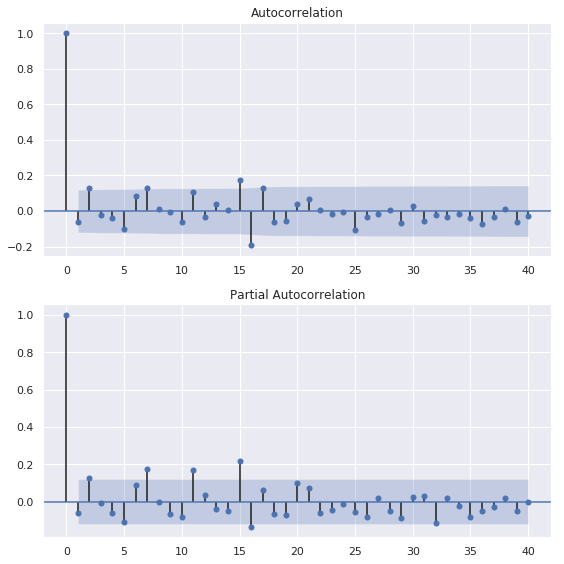

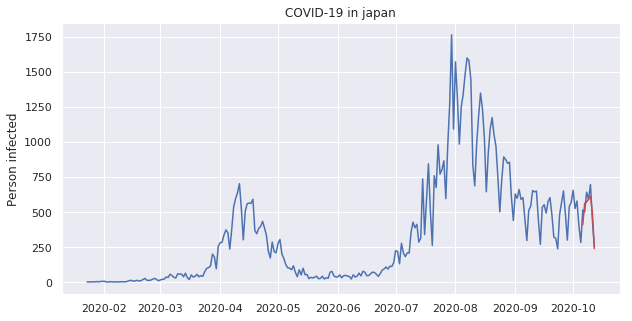

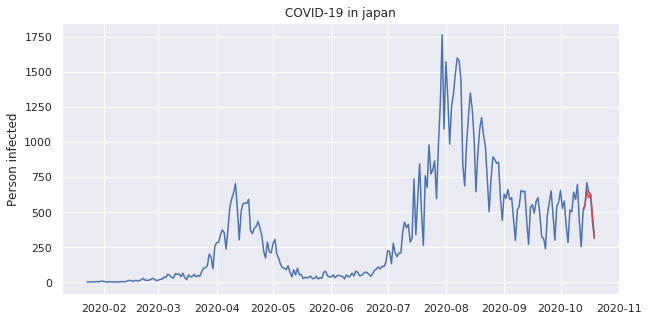

In [55]:
# SRIMAモデル（ちょっとだけパラメータ最適化・総当たりaicベストを適用）
sarimax_optimization = sm.tsa.SARIMAX(daily_japan_diff_train, 
                        order=(3, 1, 3),
                        seasonal_order=(0, 1, 1, 14),
                        enforce_stationarity = False,
                        enforce_invertibility = False
                        ).fit()

sarimax_optimization_resid = sarimax_optimization.resid # 残差成分

fig = plt.figure(figsize=(8, 8))

# 自己相関(ACF)のグラフ
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(sarimax_optimization_resid, lags=40, ax=ax1) #ACF計算とグラフ自動作成

# 偏自己相関(PACF)のグラフ
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(sarimax_optimization_resid, lags=40, ax=ax2) #PACF計算とグラフ自動作成

plt.tight_layout() # グラフ間スキマ調整

plt.figure(figsize=(10, 5))
plt.plot(daily_japan_diff_train)
sarimax_eval = sarimax_optimization.predict('2020-10-06', '2020-10-12') 
plt.plot(sarimax_eval, c="r")

plt.title('COVID-19 in japan')
plt.grid(True)
plt.ylabel('Person infected')
plt.show

plt.figure(figsize=(10, 5))
plt.plot(daily_japan_diff)
# plt.plot(test_data)
sarimax_pred = sarimax_optimization.predict('2020-10-13', '2020-10-19') 
plt.plot(sarimax_pred, c="r")

plt.title('COVID-19 in japan')
plt.grid(True)
plt.ylabel('Person infected')
plt.show

In [56]:
sarimax_pred_train = sarimax_optimization.predict('2020-01-23', '2020-10-12')
train_mae = mean_absolute_error(daily_japan_diff_train, sarimax_pred_train)
train_mse = mean_squared_error(daily_japan_diff_train, sarimax_pred_train)
train_rmse = np.sqrt(mean_squared_error(daily_japan_diff_train, sarimax_pred_train))
train_r2 = r2_score(daily_japan_diff_train, sarimax_pred_train)

test_mae = mean_absolute_error(test_data, sarimax_pred)
test_mse = mean_squared_error(test_data, sarimax_pred)
test_rmse = np.sqrt(mean_squared_error(test_data, sarimax_pred))
test_r2 = r2_score(test_data, sarimax_pred)

print('train_mae:'+str(train_mae))
print('train_mse:'+str(train_mse))
print('train_rmae:'+str(train_rmse))
print('train_r2:'+str(train_r2))
print('')
print('test_mae:'+str(test_mae))
print('test_mse:'+str(test_mse))
print('test_rmae:'+str(test_rmse))
print('test_r2:'+str(test_r2))

train_mae:61.930255073332
train_mse:11147.002092451588
train_rmae:105.5793639517287
train_r2:0.9224763967159408

test_mae:27.636181273591596
test_mse:1276.0607055910264
test_rmae:35.72199190402218
test_r2:0.9208873813835822


**おまけ**

<function matplotlib.pyplot.show(*args, **kw)>

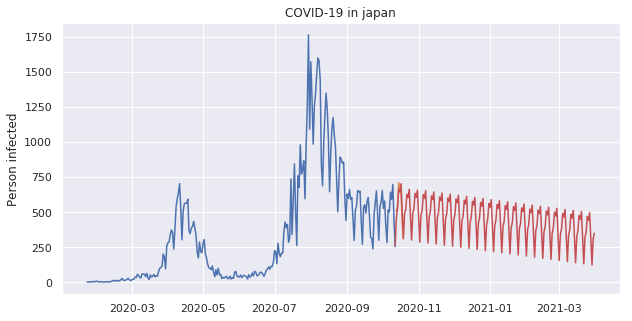

In [44]:
plt.figure(figsize=(10, 5))
plt.plot(daily_japan_diff_train)
plt.plot(test_data)
sarimax_pred_year_end = sarimax_optimization.predict('2020-10-12', '2021-03-31') 
plt.plot(sarimax_pred_year_end, c="r")

plt.title('COVID-19 in japan')
plt.grid(True)
plt.ylabel('Person infected')
plt.show